
=== Aplicação Meteorológica, a tua tabela é [((2022, 1, 20), 2, 16, 0), ((2022, 1, 21), 1, 13, 0.2), ((2022, 1, 23), 6, 19, 0.6), ((2022, 1, 24), 3, 18, 0.8), ((2022, 2, 20), 6, 19, 0.2), ((2022, 2, 24), 3, 18, 0.2), ((2022, 2, 28), 3, 18, 0.2)] ===
         1 - Mostrar temperatura mínima absoluta
         2 - Mostrar dia de maior chuva
         3 - Mostrar dias chuvosos (> valor)
         4 - Mostrar amplitude térmica por dia
         5 - Mostrar maior sequência de dias secos
         6 - Guardar tabela num ficheiro
         7 - Carregar tabela de um ficheiro
         8 - Mostrar gráfico
         0 - Sair


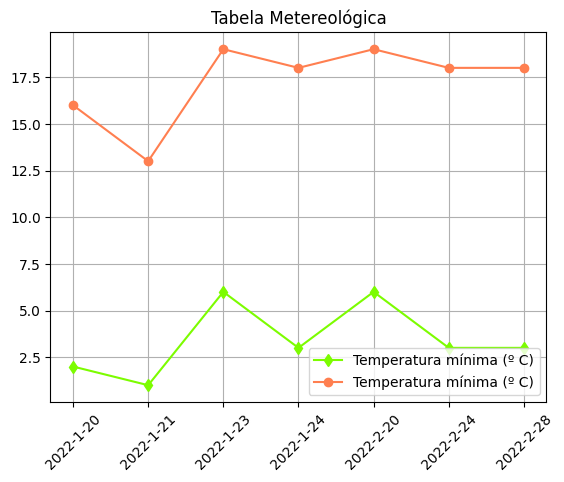

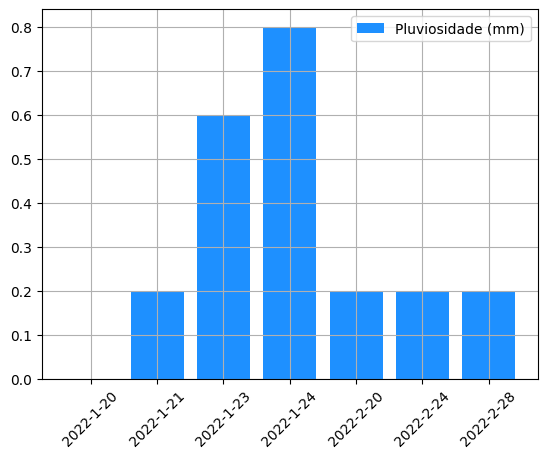


=== Aplicação Meteorológica, a tua tabela é [((2022, 1, 20), 2, 16, 0), ((2022, 1, 21), 1, 13, 0.2), ((2022, 1, 23), 6, 19, 0.6), ((2022, 1, 24), 3, 18, 0.8), ((2022, 2, 20), 6, 19, 0.2), ((2022, 2, 24), 3, 18, 0.2), ((2022, 2, 28), 3, 18, 0.2)] ===
         1 - Mostrar temperatura mínima absoluta
         2 - Mostrar dia de maior chuva
         3 - Mostrar dias chuvosos (> valor)
         4 - Mostrar amplitude térmica por dia
         5 - Mostrar maior sequência de dias secos
         6 - Guardar tabela num ficheiro
         7 - Carregar tabela de um ficheiro
         8 - Mostrar gráfico
         0 - Sair
A sair...
None


In [4]:
from matplotlib import pyplot as plt

tabMeteo1 = [((2022,1,20), 2, 16, 0),((2022,1,21), 1, 13, 0.2), ((2022,1,22), 7, 17, 0.01)]
tabMeteo3 = [((2022,1,20), 2, 16, 0), ((2022,1,21), 1, 13, 0.2), ((2022,1,23), 6, 19, 0.6), ((2022,1,24), 3, 18, 0.8),((2022,2,20), 6, 19, 0.2), ((2022,2,24), 3, 18, 0.2), ((2022,2,28), 3, 18, 0.2)]

def medias(tabMeteo):
    res = []
    for data, tmin , tmax, prec in tabMeteo1:
        media = (tmin + tmax)/2
        res.append((data, media))
    return res

def guardaTabMeteo(t, fnome):
    f =open(fnome, "w")
    for data, tmin, tmax, prec in t:
        ano,mes,dia = data
        f.write(f"{ano}-{mes}-{dia};{tmin};{tmax};{prec}\n")
    f.close()
    return

def carregaTabMeteo(fnome):
    res = []
    f=open(fnome,"r")
    for line in f:
        line=line.strip()
        met=line.split(";")
        d,tmin,tmax,prec=met
        ano, mes, dia=d.split("-")
        res.append(((int(ano),int(mes),int(dia)),float(tmin),float(tmax),float(prec)))
    f.close()
    return res

tabMeteo2 = carregaTabMeteo("meteorologia.txt")

def minMin(tabMeteo):
    minima=tabMeteo[0][1]
    for i in tabMeteo:
        if i[1]<minima:
            minima=i[1]
    return minima

def amplTerm(tabMeteo):
    res = []
    for t in tabMeteo:
        data,tmin,tmax,perc=t
        soma=tmax-tmin
        res.append((data,soma))

    return res

def maxChuva(tabMeteo):
    max_prec=tabMeteo[0][3]
    for i in tabMeteo:
        if i[3]>max_prec:
            max_prec=i[3]
            max_data=i[0]

    return (max_data, max_prec)

def diasChuvosos(tabMeteo, p):
    res=[]
    for t in tabMeteo:
        if t[3]>p:
            n=(t[0],t[3])
            res.append(n)
    return res

def maxPeriodoCalor(tabMeteo, p):
    cont=0
    for t in tabMeteo:
        if t[3]<p:
            cont+=1
        else:
            cont=0
    return cont

def grafTabMeteo(t):
    x = [f"{data[0]}-{data[1]}-{data[2]}" for data,tmin,tmax,prec in t] #data *_
    ytmin = [tmin for data,tmin,tmax,prec in t]
    ytmax = [tmax for data,tmin,tmax,prec in t]

    yprec=[prec for *_,prec in t]
    plt.plot(x,ytmin, label="Temperatura mínima (º C)", color="lawngreen", marker="d")
    plt.plot(x,ytmax, label="Temperatura mínima (º C)", color="coral", marker="o")
    plt.legend()
    plt.title("Tabela Metereológica")
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    plt.bar(x,yprec, label="Pluviosidade (mm)", color="dodgerblue")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    return

def main():
    tabMeteo3 = [
        ((2022,1,20), 2, 16, 0),
        ((2022,1,21), 1, 13, 0.2),
        ((2022,1,23), 6, 19, 0.6),
        ((2022,1,24), 3, 18, 0.8),
        ((2022,2,20), 6, 19, 0.2),
        ((2022,2,24), 3, 18, 0.2),
        ((2022,2,28), 3, 18, 0.2)
    ]
    opcao=-1
    while opcao!=0:
        print(f"""\n=== Aplicação Meteorológica, a tua tabela é {tabMeteo3} ===
         1 - Mostrar temperatura mínima absoluta
         2 - Mostrar dia de maior chuva
         3 - Mostrar dias chuvosos (> valor)
         4 - Mostrar amplitude térmica por dia
         5 - Mostrar maior sequência de dias secos
         6 - Guardar tabela num ficheiro
         7 - Carregar tabela de um ficheiro
         8 - Mostrar gráfico
         0 - Sair""")

        opcao=int(input("Escolha uma opção: "))

        if opcao == 1:
            print("Temperatura mínima absoluta:", minMin(tabMeteo3))
        elif opcao == 2:
            print("Dia de maior chuva:", maxChuva(tabMeteo3))
        elif opcao == 3:
            p = float(input("Valor mínimo de precipitação: "))
            print("Dias chuvosos:", diasChuvosos(tabMeteo3, p))
        elif opcao == 4:
            print("Amplitude térmica:", amplTerm(tabMeteo3))
        elif opcao == 5:
            p = float(input("Valor máximo de precipitação para considerar 'seco': "))
            print("Maior sequência de dias secos:", maxPeriodoCalor(tabMeteo3, p))
        elif opcao == 6:
            nome = input("Nome do ficheiro: ")
            guardaTabMeteo(tabMeteo3, nome)
            print("Tabela guardada com sucesso!")
        elif opcao == 7:
            nome = input("Nome do ficheiro: ")
            tabMeteo3 = carregaTabMeteo(nome)
            print(tabMeteo3)
            print("Tabela carregada com sucesso!")
        elif opcao == 8:
            grafTabMeteo(tabMeteo3)
        elif opcao == 0:
            print("A sair...")
        else:
            print("Opção inválida. Tente novamente.")

print(main())